<a href="https://colab.research.google.com/github/paridhi-singhal/Breast-Cancer-Prediction/blob/main/Prediction_Breast_cancer_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
dataset = pd.read_csv('/content/breast-cancer.csv')

In [ ]:
dataset.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [ ]:
dataset.shape

(569, 32)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
dataset.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
dataset.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [ ]:
dataset.groupby('diagnosis').mean()

id  radius_mean  texture_mean  perimeter_mean  \
diagnosis                                                            
B          2.654382e+07    12.146524     17.914762       78.075406   
M          3.681805e+07    17.462830     21.604906      115.365377   

            area_mean  smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                                  
B          462.790196         0.092478          0.080085        0.046058   
M          978.376415         0.102898          0.145188        0.160775   

           concave points_mean  symmetry_mean  ...  radius_worst  \
diagnosis                                      ...                 
B                     0.025717       0.174186  ...     13.379801   
M                     0.087990       0.192909  ...     21.134811   

           texture_worst  perimeter_worst   area_worst  smoothness_worst  \
diagnosis                                                                  
B              23.515070        87.005938   558.899440          0.124959   
M              29.318208       141.370330  1422.286321          0.144845   

           compactness_worst  concavity_worst  concave points_worst  \
diagnosis                                                             
B                   0.182673         0.166238              0.074444   
M                   0.374824         0.450606              0.182237   

           symmetry_worst  fractal_dimension_worst  
diagnosis                                           
B                0.270246                 0.079442  
M                0.323468                 0.091530  

[2 rows x 31 columns]

In [ ]:
X_data = dataset.drop(columns='diagnosis',axis=1)
Y_data = dataset['diagnosis']
label_encode = LabelEncoder()
Y_data = label_encode.fit_transform(Y_data)

1 -> Malignant
0-> benign

In [ ]:
print(X_data)
print(Y_data)

           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302        17.99         10.38          122.80     1001.0   
1      842517        20.57         17.77          132.90     1326.0   
2    84300903        19.69         21.25          130.00     1203.0   
3    84348301        11.42         20.38           77.58      386.1   
4    84358402        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564    926424        21.56         22.39          142.00     1479.0   
565    926682        20.13         28.25          131.20     1261.0   
566    926954        16.60         28.08          108.30      858.1   
567    927241        20.60         29.33          140.10     1265.0   
568     92751         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

In [ ]:
X_train,X_test,Y_train,Y_test= train_test_split(X_data,Y_data,test_size=0.2,random_state=2)

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
X_train_prediction= model.predict(X_train)
print (accuracy_score(X_train_prediction,Y_train))

0.9274725274725275


In [ ]:
X_test_prediction= model.predict(X_test)
print (accuracy_score(X_test_prediction,Y_test))

0.9122807017543859


Building neural network

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras


In [ ]:
#setting layers of NN

model = keras.Sequential([keras.layers.Flatten(input_shape=(31,))
                          ,keras.layers.Dense(20,activation='relu')
                          ,keras.layers.Dense(2,activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#compiling the NN

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
history = model.fit(X_train_std,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5674 - loss: 0.7391 - val_accuracy: 0.6522 - val_loss: 0.6847
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7055 - loss: 0.5038 - val_accuracy: 0.8261 - val_loss: 0.4847
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8297 - loss: 0.3734 - val_accuracy: 0.9130 - val_loss: 0.3612
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8826 - loss: 0.2969 - val_accuracy: 0.9565 - val_loss: 0.2822
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9109 - loss: 0.2478 - val_accuracy: 0.9348 - val_loss: 0.2294
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9316 - loss: 0.2130 - val_accuracy: 0.9348 - val_loss: 0.1936
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9337 - loss: 0.1868 - val_accuracy: 0.9565 - val_loss: 0.1677
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9452 - loss: 0.1666 - val_accuracy: 0.9565 - val_loss

In [ ]:
import matplotlib.pyplot as plt

Visualizing accuracy and loss

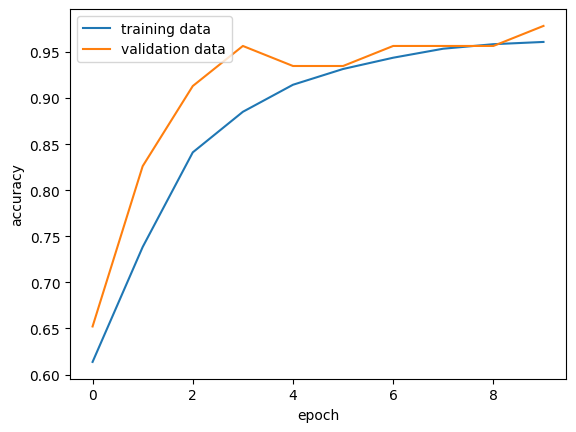

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data','validation data'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test_std,Y_test)
print(accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9390 - loss: 0.1575  
0.9385964870452881


In [ ]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 31)
[-0.23949961 -0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457
 -0.11323672  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124
  2.62763999  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593
  2.88971815 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552
 -0.38767294  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515
 -0.6268286 ]


In [ ]:
Y_pred = model.predict(X_test_std)
# gives prediction probablity of each class for that data point

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [ ]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.4061781 0.5356524]


In [ ]:
#converting to labels
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]


Building the predictive system

In [ ]:
input_data = (864726,8.95,15.76,58.74,245.2,0.09462,0.1243,0.09263,0.02308,0.1305,0.07163,0.3132,0.9789,3.28,16.94,0.01835,0.0676,0.09263,0.02308,0.02384,0.005601,9.414,17.07,63.34,270,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722
)
input = np.asarray(input_data)
input = input.reshape(1,-1)
input_std = scaler.transform(input)
prediction = model.predict(input_std)

prediction_label = [np.argmax(prediction)]

if(prediction_label[0]==1):
  print("The breast cancer is Malignant")
else:
  print("The breast cancer is Benign")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
The breast cancer is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
